1.Problem Statement:

You are tasked with building a machine learning model to predict the survival outcomes of passengers aboard the Titanic. The dataset you will be working with is the Titanic Data Set from Kaggle, which contains information about passengers such as their age, gender, class, ticket fare, and whether they survived or not.

The goal is to implement Logistic Regression in Python for classification, specifically predicting whether a passenger survived (1) or deceased (0) based on the given features.

Import necessary libraries including pandas, numpy, matplotlib, seaborn, and sklearn.

In [225]:
#importing necessary files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Read the Titanic dataset ('titanic_train.csv') into a pandas dataframe.

In [226]:
dataframe=pd.read_csv("titanic_train.csv")
dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Perform exploratory data analysis (EDA) to understand the data, including checking for missing data, visualizing distributions, and analyzing correlations between features.

In [227]:
#checking null values
dataframe.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [228]:
dataframe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [229]:
#dropping columns which will not affect the model
dataframe.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], inplace=True, axis=1)  # axis = 1 defines column wise


In [230]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


Clean the data by handling missing values, converting categorical features into numerical format, and dropping unnecessary columns.

In [231]:
# Calculate the mean age
median_age = dataframe['Age'].median()

# Fill null values in the 'Age' column with the mean age
dataframe['Age'] = dataframe['Age'].fillna(median_age)


In [232]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [233]:
# mapping male to 0 and female to 1
sex_mapping={'male':0,'female':1}
dataframe['Sex']=dataframe['Sex'].map(sex_mapping)

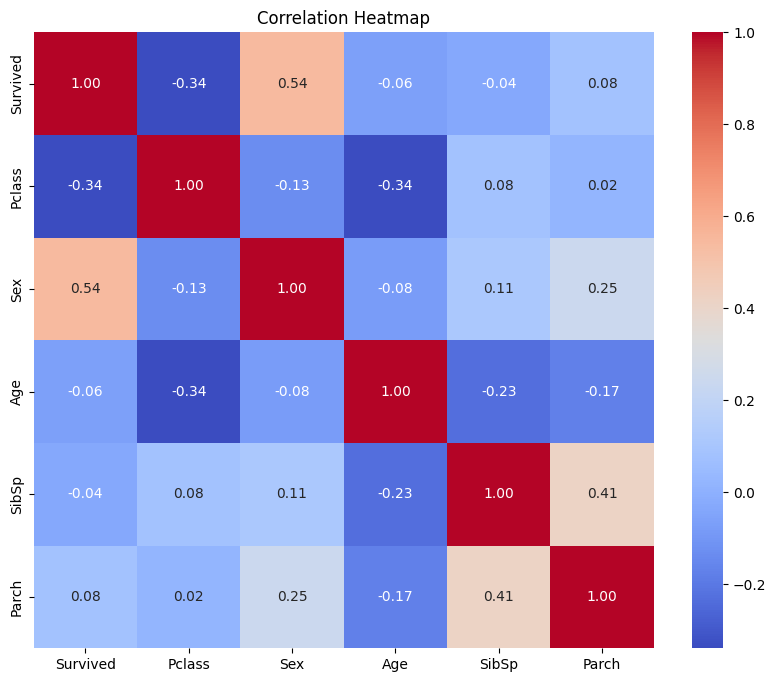

In [234]:
# checking the correlations between columns
correlation_matrix = dataframe.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [235]:
dataframe

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0
...,...,...,...,...,...,...
886,0,2,0,27.0,0,0
887,1,1,1,19.0,0,0
888,0,3,1,28.0,1,2
889,1,1,0,26.0,0,0


<Axes: xlabel='Sex', ylabel='Survived'>

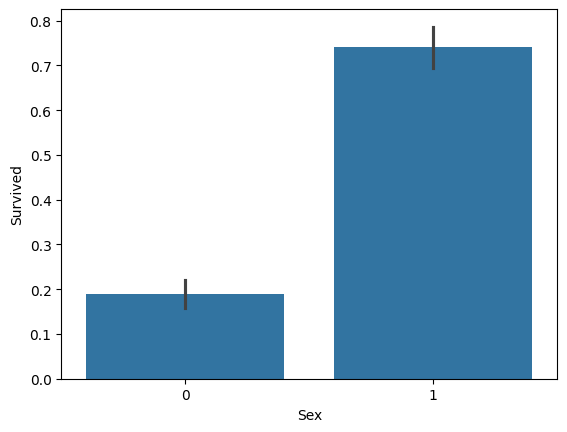

In [236]:
sns.barplot(x='Sex',y='Survived',data=dataframe)  #plotting barplot between sex and survived

<Axes: xlabel='Pclass', ylabel='Survived'>

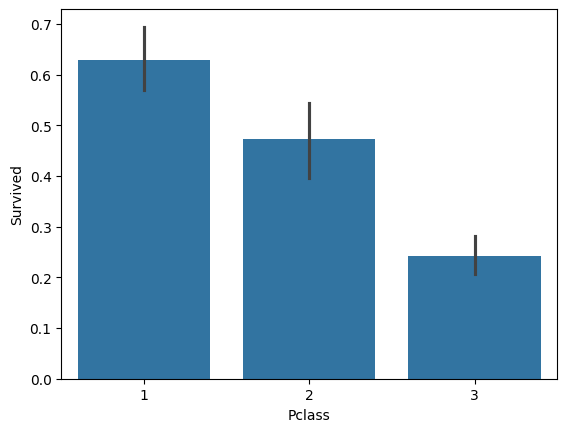

In [237]:
sns.barplot(x='Pclass',y='Survived',data=dataframe)  #plotting barplot between Pclass and survived

<Axes: xlabel='Parch', ylabel='Survived'>

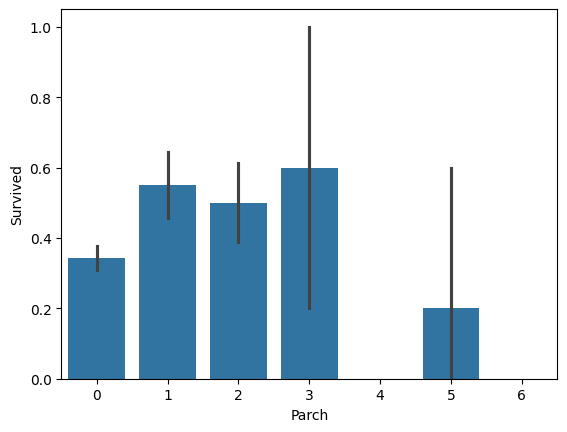

In [238]:
sns.barplot(x='Parch',y='Survived',data=dataframe) #plotting barplot between parch and survived

Split the data into training and testing sets using train_test_split from sklearn.

In [239]:
X=dataframe.drop(columns=['Survived'])
y=dataframe['Survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [240]:
model=LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

Train the model on the training data and make predictions on the testing data.

In [241]:
test_predictions=model.predict(X_test)
train_predictions=model.predict(X_train)

Evaluate the model's performance using classification metrics such as precision, recall, and f1-score.

In [242]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
print("Accuracy is: ", accuracy_score(y_test,test_predictions))
print("F1 Score is: ", f1_score(y_test,test_predictions))
print("Precision Score is: ", precision_score(y_test,test_predictions))
print("Recall Score is: ", recall_score(y_test,test_predictions))
print()
print("Accuracy is: ", accuracy_score(y_train,train_predictions))
print("F1 Score is: ", f1_score(y_train,train_predictions))
print("Precision Score is: ", precision_score(y_train,train_predictions))
print("Recall Score is: ", recall_score(y_train,train_predictions))

Accuracy is:  0.8156424581005587
F1 Score is:  0.7724137931034483
Precision Score is:  0.7887323943661971
Recall Score is:  0.7567567567567568

Accuracy is:  0.7851123595505618
F1 Score is:  0.7074569789674953
Precision Score is:  0.7254901960784313
Recall Score is:  0.6902985074626866
